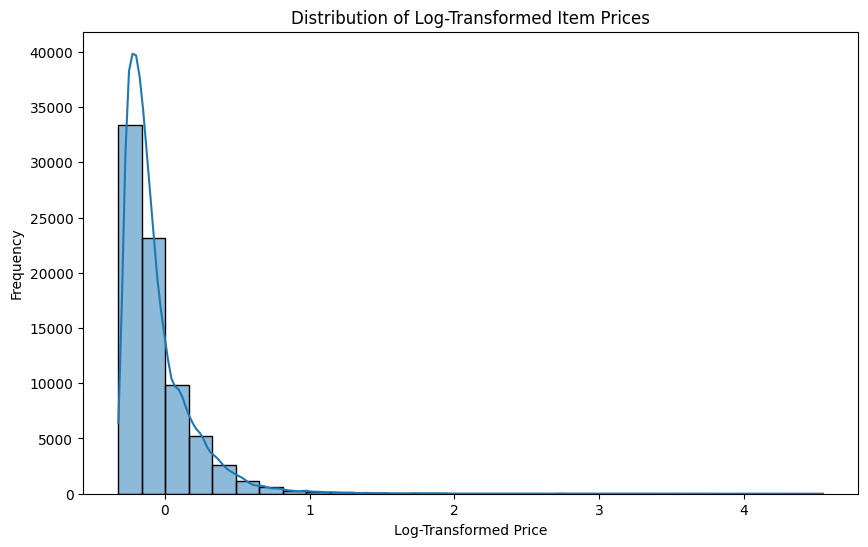

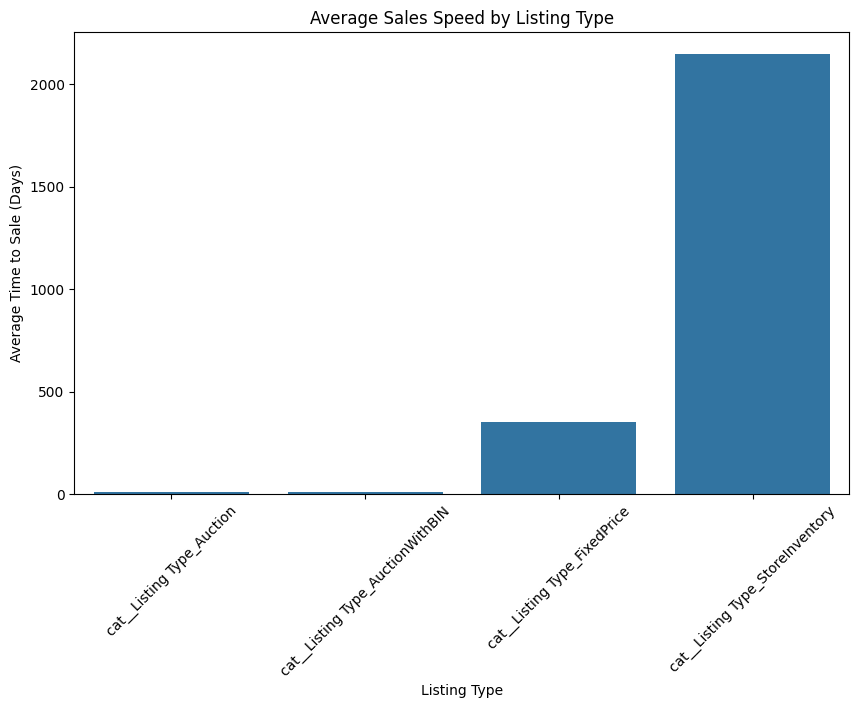

C:\Users\Joyce\AppData\Local\Temp\ipykernel_9476\164940907.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_feedback_by_price_range = df.groupby('price_range')['num__Feedback Score'].mean()


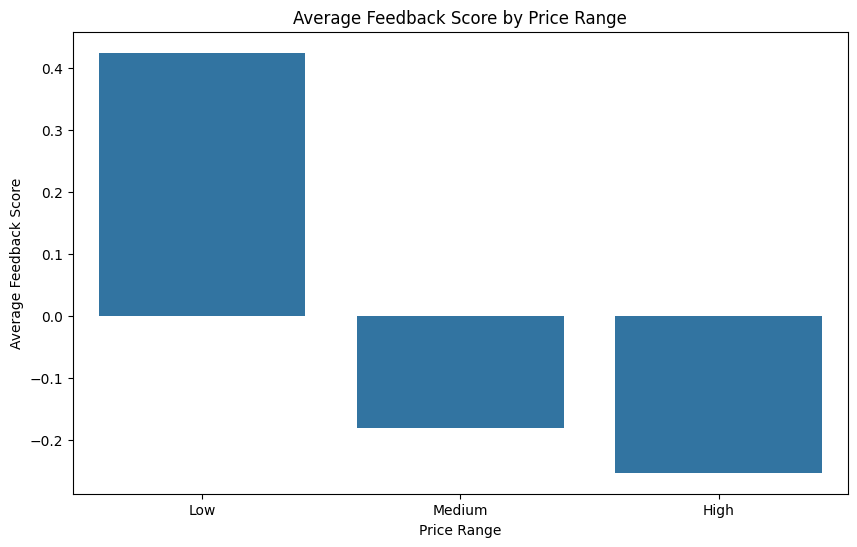

In [4]:
# Re-run the EDA code, ensuring the CSV file 'transformed_ebay_data.csv' is loaded properly

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV file
file_path = 'transformed_ebay_data.csv'
df = pd.read_csv(file_path)

# Apply a log transformation to the Price column to reduce skewness
df['log_price'] = np.log1p(df['num__Price'])  # Using log1p to handle zero prices

# Plot the distribution of the log-transformed prices
plt.figure(figsize=(10, 6))
sns.histplot(df['log_price'], kde=True, bins=30)
plt.title("Distribution of Log-Transformed Item Prices")
plt.xlabel("Log-Transformed Price")
plt.ylabel("Frequency")
plt.show()

# 2. Average sales speed (Time duration) based on listing type
listing_type_columns = [
    'cat__Listing Type_Auction', 
    'cat__Listing Type_AuctionWithBIN', 
    'cat__Listing Type_FixedPrice', 
    'cat__Listing Type_StoreInventory'
]

# Calculate average time to sale for each listing type
avg_time_per_listing_type = {
    col: df.loc[df[col] == 1, 'remainder__Time duration'].mean() for col in listing_type_columns
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(avg_time_per_listing_type.keys()), y=list(avg_time_per_listing_type.values()))
plt.title("Average Sales Speed by Listing Type")
plt.xlabel("Listing Type")
plt.ylabel("Average Time to Sale (Days)")
plt.xticks(rotation=45)
plt.show()

# 3. Average feedback scores by price range
# Divide prices into three quantiles (Low, Medium, High)
df['price_range'] = pd.qcut(df['num__Price'], q=3, labels=['Low', 'Medium', 'High'])

# Calculate the average feedback score for each price range
avg_feedback_by_price_range = df.groupby('price_range')['num__Feedback Score'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_feedback_by_price_range.index, y=avg_feedback_by_price_range.values)
plt.title("Average Feedback Score by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Feedback Score")
plt.show()
